<a target="_blank" href="https://colab.research.google.com/github/sonder-art/automl_p24/blob/main/codigo/intro_ml/06_classification.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Classification

En esta sección, exploraremos el concepto de clasificación, centrándonos en la clasificación binaria. A diferencia de la regresión, que predice una salida continua, la clasificación se utiliza para predecir etiquetas discretas. Por ejemplo, determinar si un correo electrónico es spam o no spam es un problema de clasificación binaria. La regresión logística es un método popular para resolver problemas de clasificación binaria, y profundizaremos en cómo funciona.


## Funcion Logistica

La función logística, también conocida como función sigmoide, es central para la regresión logística. Se define como:

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

+ $(z)$ es la entrada a la función. La función sigmoide produce un valor entre 0 y 1, lo que la hace adecuada para tareas de clasificación binaria.  

### Visualizando de Sigmoide

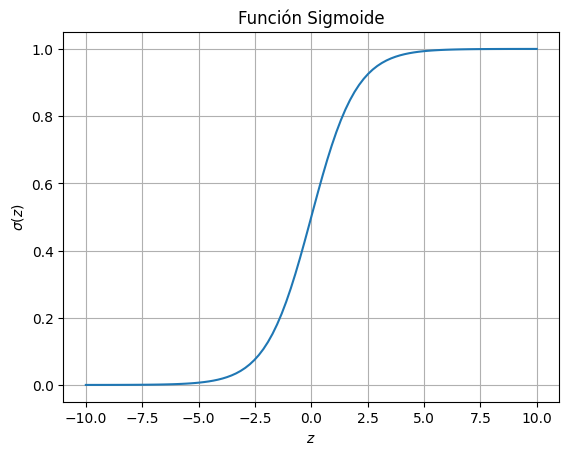

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def plot_sigmoid():
    z = np.linspace(-10, 10, 100)
    plt.plot(z, sigmoid(z))
    plt.title('Función Sigmoide')
    plt.xlabel('$z$')
    plt.ylabel('$\sigma(z)$')
    plt.grid(True)
    plt.show()

plot_sigmoid()


## Crear Datos Sinteticos

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [3]:
# Generar datos
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0, 
                           n_clusters_per_class=1,
                           flip_y = .5,
                           random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convertir los conjuntos de datos a DataFrames para un análisis más fácil
train_df = pd.DataFrame(X_train)
train_df.columns = [f'x{c}' for c in train_df.columns]
train_df['Target'] = y_train

test_df = pd.DataFrame(X_test)
test_df.columns = [f'x{c}' for c in test_df.columns]
test_df['Target'] = y_test

train_df.head()

,x0,x1,x2,Target
0,0.476797,-0.966618,0.921650,0
1,1.059332,-0.838992,-0.328618,0
2,1.223449,-1.159815,1.047318,0
3,0.835564,1.059848,-0.960046,0
4,2.074328,-0.418246,-0.973546,0


## Analisis exploratorio de datos (EDA) 

In [4]:
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Verificar Balanceo de Clases

In [5]:
# Verificar el balance de clases en los conjuntos de entrenamiento y prueba
train_class_distribution = train_df['Target'].value_counts(normalize=True)
test_class_distribution = test_df['Target'].value_counts(normalize=True)

print("Distribución de clases en el conjunto de entrenamiento:\n", train_class_distribution)
print("\nDistribución de clases en el conjunto de prueba:\n", test_class_distribution)


Distribución de clases en el conjunto de entrenamiento:
 Target
1    0.50625
0    0.49375
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
 Target
1    0.555
0    0.445
Name: proportion, dtype: float64


### Estadisticos Descriptivos

In [6]:
# Estadísticas descriptivas del conjunto de entrenamiento
train_stats = train_df.describe()
print("\nEstadísticas descriptivas del conjunto de entrenamiento:\n", train_stats)

# Estadísticas descriptivas del conjunto de prueba
test_stats = test_df.describe()
print("\nEstadísticas descriptivas del conjunto de prueba:\n", test_stats)



Estadísticas descriptivas del conjunto de entrenamiento:
                x0          x1          x2      Target
count  800.000000  800.000000  800.000000  800.000000
mean     1.039500   -0.016792    0.014599    0.506250
std      1.076169    1.219499    0.981888    0.500274
min     -2.472718   -2.850971   -3.019512    0.000000
25%      0.307209   -0.980116   -0.638353    0.000000
50%      1.038600   -0.106299    0.003796    1.000000
75%      1.749988    0.956926    0.680675    1.000000
max      4.138715    3.226728    2.985259    1.000000

Estadísticas descriptivas del conjunto de prueba:
                x0          x1          x2      Target
count  200.000000  200.000000  200.000000  200.000000
mean     0.971199    0.003704   -0.021589    0.555000
std      1.053283    1.251587    1.005121    0.498213
min     -2.193402   -2.613878   -2.296181    0.000000
25%      0.315762   -0.986391   -0.687882    0.000000
50%      0.943881   -0.058001   -0.022851    1.000000
75%      1.680379    1.07

Veamos las correlaciones entre variables

In [7]:
train_df.corr()

,x0,x1,x2,Target
x0,1.000000,0.030910,0.029321,0.059209
x1,0.030910,1.000000,0.023533,0.436432
x2,0.029321,0.023533,1.000000,0.035469
Target,0.059209,0.436432,0.035469,1.000000


### Visualizaciones

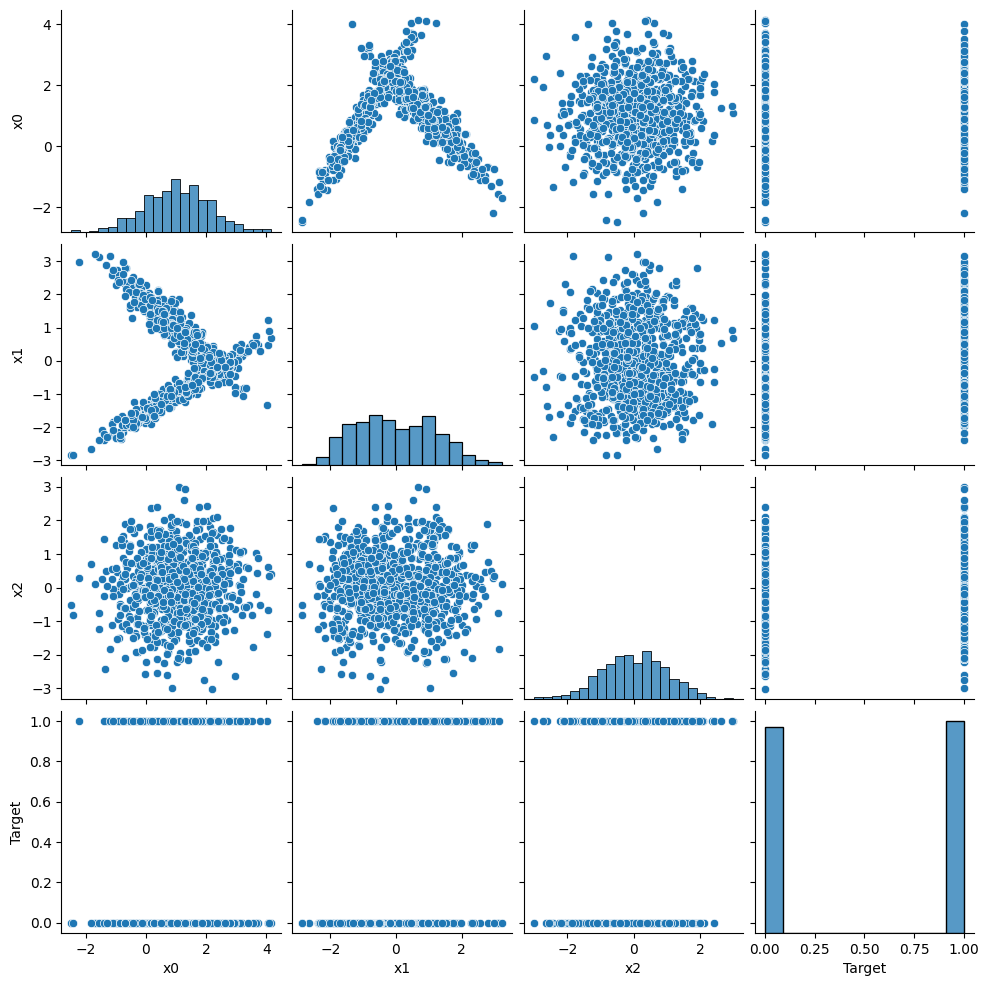

In [8]:
sns.pairplot(train_df)

Vamos a graficarlo por colores

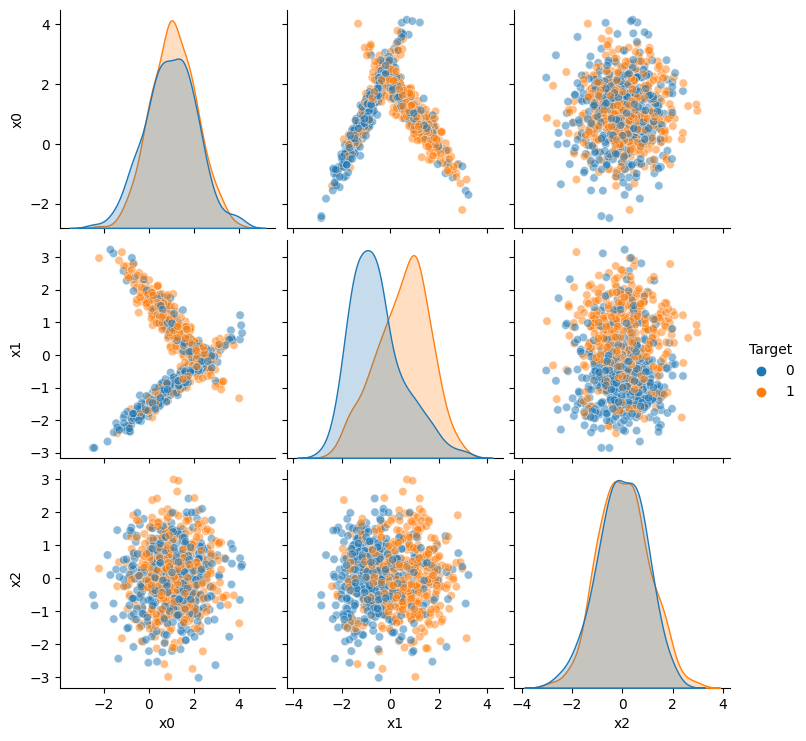

In [9]:
# Gráfico de dispersión para el conjunto de entrenamiento
sns.pairplot(train_df, hue='Target', plot_kws={'alpha': 0.5})
plt.show()

+ Como se comparan las visualizaciones, especialmente $(x0,x2)$ respecto a las correlaciones que habiamos encontrado antes?
+ Que implica esto sobre la correlacion?

In [10]:
def plot_density_per_x(df,x):
    sns.kdeplot(data=df, x=x, hue='Target', fill=True, common_norm=False, alpha=0.5)


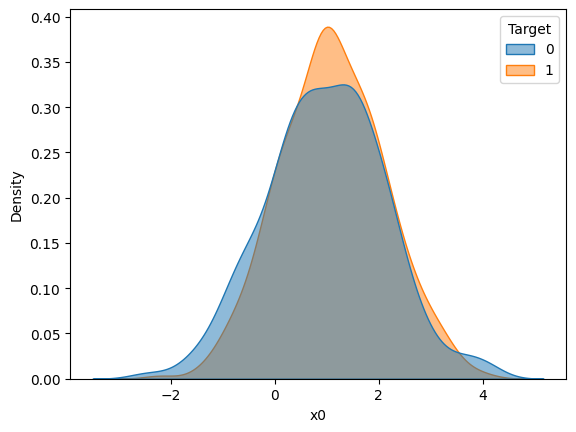

In [11]:
plot_density_per_x(train_df,'x0')

## Regresion Logistica

El modelo de regresión logística predice la probabilidad de que una entrada dada pertenezca a una clase particular (por ejemplo, clase 1) y se da por:

$
P(y=1|x) = \sigma(\theta^Tx) = \sigma(z)
$

+ $x$ son las características de entrada
+ $\theta$ son los parámetros del modelo 
+ $z = (\theta^Tx)$
+ $P(y=1|x)$ es la probabilidad de que la entrada $x$ se clasifique como clase 1.


### Preguntas

+ Por que la regresion logistica no es equivalente a entrenar una regresion lineal en una salida binaria (0,1) para `y`, y despues aplicar la funcion sigmoide?
  + La respuesta esta en el plantamiento del problema (Lagrangeano)

### Entrenamiento y Test

Utilicemos 3 modelos: regresion logistica, arbol de decision y moda (clase mas comun siempre)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
from sklearn.metrics import accuracy_score


In [13]:
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def train_decision_tree(X_train, y_train, max_depth=3):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    return model

def train_mode_classifier(X_train, y_train):
    from scipy.stats import mode
    most_common = mode(y_train)[0]
    model = lambda X: np.full(shape=(len(X),), fill_value=most_common)
    return model


In [14]:
def evaluate_model(model, X_test, y_test):
    if callable(model):
        y_pred = model(X_test)
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [15]:
def compare_models(models, X_test, y_test):
    accuracies = [evaluate_model(model, X_test, y_test) for model in models]
    model_names = ['Logistic Regression', 'Decision Tree', 'Mode Classifier']

    plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.show()


In [36]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, recall_score, matthews_corrcoef

def evaluate_model_on_train_test(model, X_train, y_train, X_test, y_test):
    # Preparar predicciones
    if callable(model):
        y_train_pred = model(X_train)
        y_test_pred = model(X_test)
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Calcular métricas
    metrics = {
        'Accuracy (Train)': accuracy_score(y_train, y_train_pred),
        'Accuracy (Test)': accuracy_score(y_test, y_test_pred),
        'Balanced Accuracy (Train)': balanced_accuracy_score(y_train, y_train_pred),
        'Balanced Accuracy (Test)': balanced_accuracy_score(y_test, y_test_pred),
        'F1 Score (Test)': f1_score(y_test, y_test_pred),
        'F1 Score (Train)': f1_score(y_train, y_train_pred),
        'Recall (Train)': recall_score(y_train, y_train_pred),
        'Recall (Test)': recall_score(y_test, y_test_pred),
        'MCC (Test)': matthews_corrcoef(y_test, y_test_pred),
        'MCC (Train)': matthews_corrcoef(y_train, y_train_pred)
        
    }
    
    # AUC-ROC requiere probabilidades para la clase positiva en caso de clasificadores
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        metrics['AUC-ROC (Test)'] = roc_auc_score(y_test, y_test_proba)
        y_train_proba = model.predict_proba(X_train)[:, 1]
        metrics['AUC-ROC (Train)'] = roc_auc_score(y_train, y_train_proba)


    return metrics


In [37]:
def compare_performance(models, X_train, y_train, X_test, y_test):
    metrics_list = ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Recall', 'MCC', 'AUC-ROC']
    results = []

    # Iterar sobre los modelos y evaluarlos
    for name, model in models.items():
        metrics = evaluate_model_on_train_test(model, X_train, y_train, X_test, y_test)
        metrics['Modelo'] = name
        results.append(metrics)

    # Crear DataFrame para la tabla con resultados
    for metric in metrics_list:
        df = pd.DataFrame({
            'Metric': [metric for _ in models.keys()],
            'Modelo': [result['Modelo'] for result in results],
            'Entrenamiento': [result.get(metric + ' (Train)', None) for result in results],
            'Prueba': [result.get(metric + ' (Test)', None) for result in results]
        }).dropna(how='all', subset=['Entrenamiento', 'Prueba'])  # Eliminar filas donde ambas métricas son None

        if df.empty:
            continue  # Si no hay datos para la métrica, saltar la visualización

        # Visualización para cada métrica
        print(df)
        plt.figure(figsize=(10, 6))
        df_melted = pd.melt(df, id_vars=['Metric', 'Modelo'], var_name='Conjunto', value_name=metric)
        sns.barplot(data=df_melted, x='Modelo', y=metric, hue='Conjunto')
        plt.title(f'Comparación de {metric} por Modelo')
        plt.xlabel('Modelo')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.legend(title='Conjunto')
        plt.tight_layout()
        plt.show()

In [18]:
# Entrenar modelos
lr_model = train_logistic_regression(X_train, y_train)
dt_model = train_decision_tree(X_train, y_train)
mode_model = train_mode_classifier(X_train, y_train)


     Metric               Modelo  Entrenamiento  Prueba
0  Accuracy  Logistic Regression        0.72000   0.730
1  Accuracy        Decision Tree        0.76375   0.750
2  Accuracy      Mode Classifier        0.50625   0.555


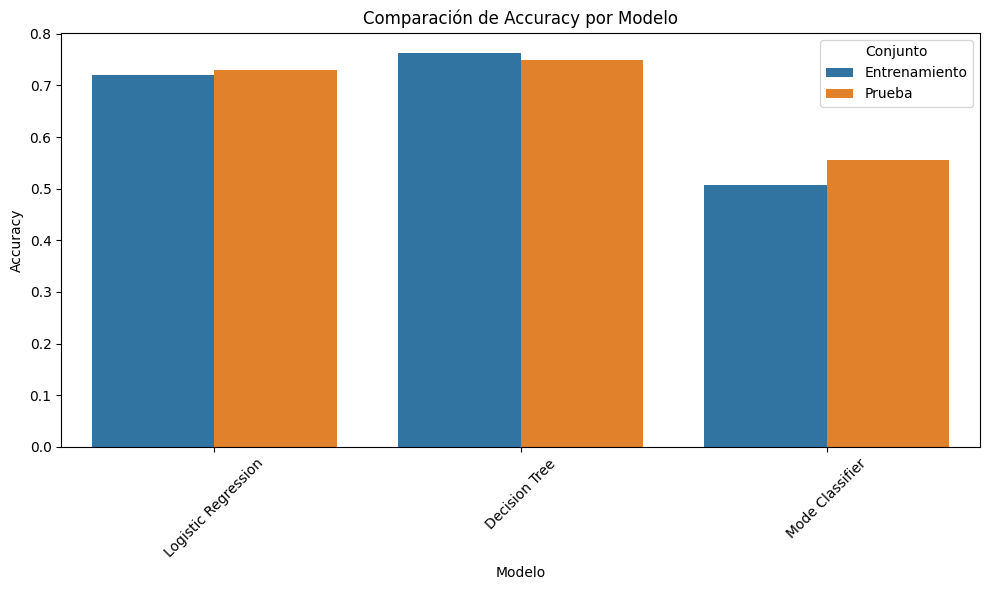

              Metric               Modelo  Entrenamiento    Prueba
0  Balanced Accuracy  Logistic Regression       0.719737  0.730033
1  Balanced Accuracy        Decision Tree       0.763666  0.750278
2  Balanced Accuracy      Mode Classifier       0.500000  0.500000


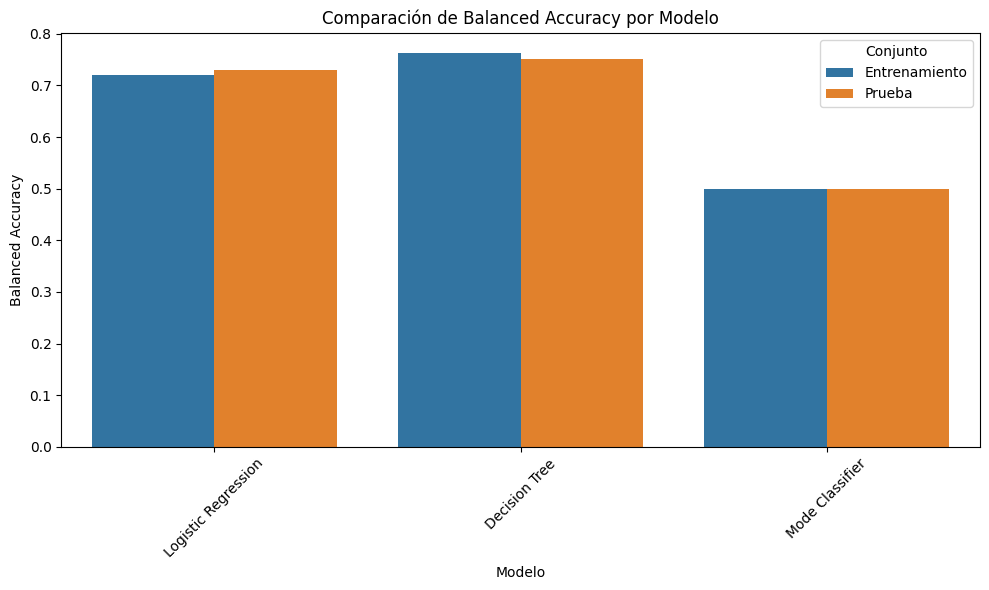

     Metric               Modelo  Entrenamiento    Prueba
0  F1 Score  Logistic Regression       0.728155  0.750000
1  F1 Score        Decision Tree       0.767528  0.768519
2  F1 Score      Mode Classifier       0.672199  0.713826


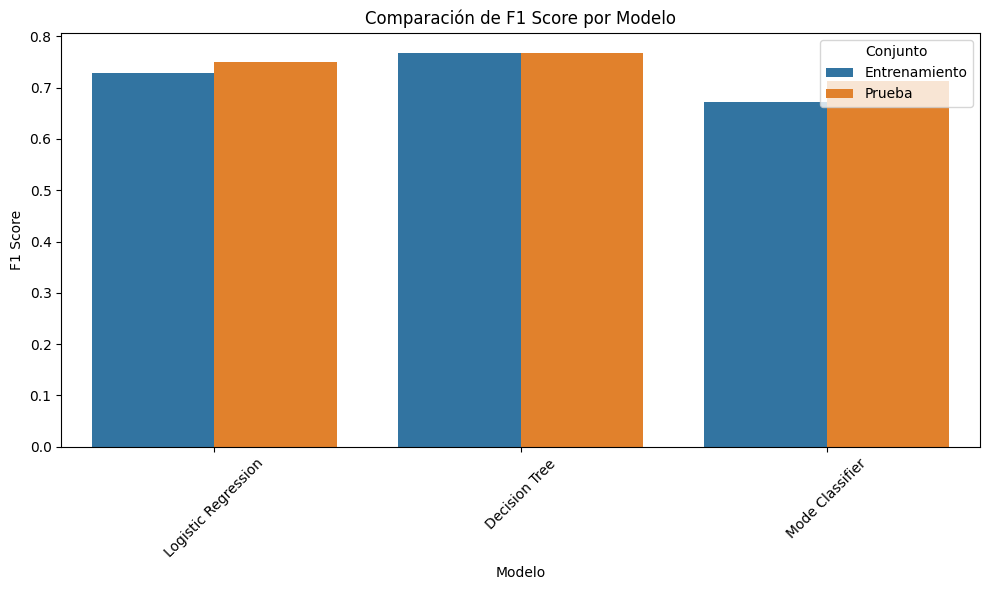

   Metric               Modelo  Entrenamiento    Prueba
0  Recall  Logistic Regression       0.740741  0.729730
1  Recall        Decision Tree       0.770370  0.747748
2  Recall      Mode Classifier       1.000000  1.000000


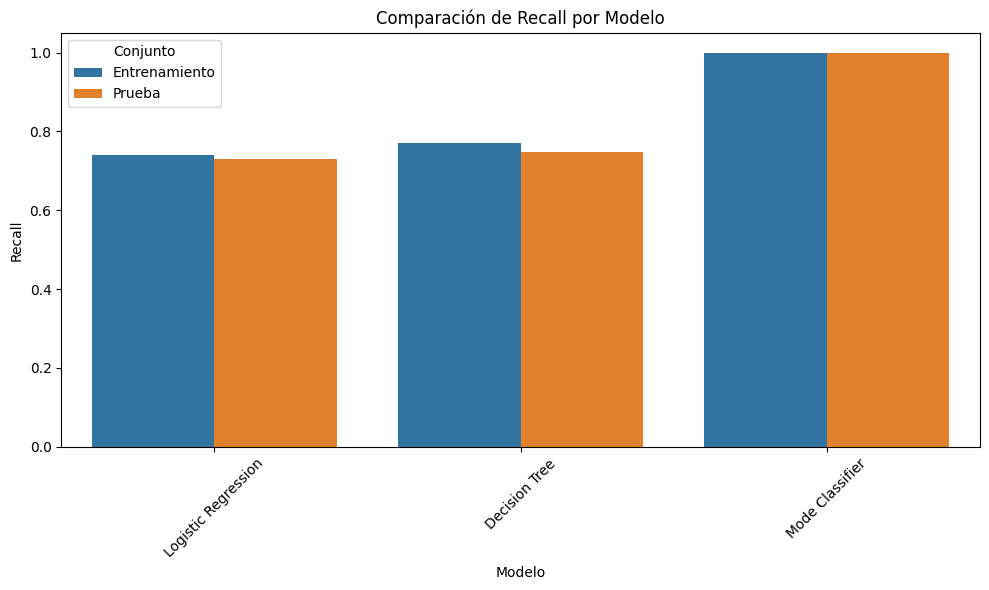

  Metric               Modelo  Entrenamiento    Prueba
0    MCC  Logistic Regression       0.439937  0.457848
1    MCC        Decision Tree       0.527397  0.498142
2    MCC      Mode Classifier       0.000000  0.000000


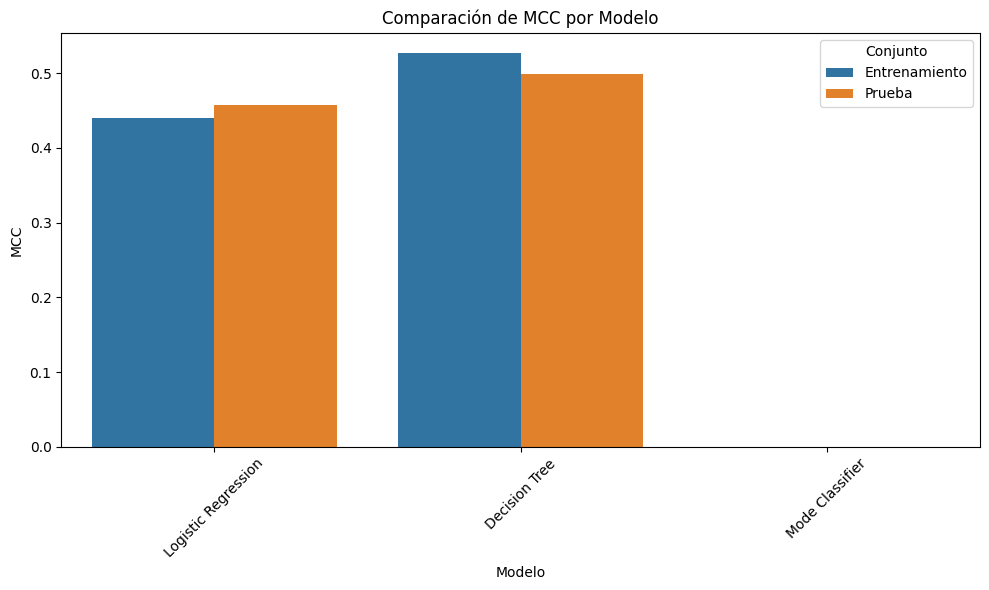

    Metric               Modelo  Entrenamiento    Prueba
0  AUC-ROC  Logistic Regression       0.759887  0.777913
1  AUC-ROC        Decision Tree       0.786851  0.760958


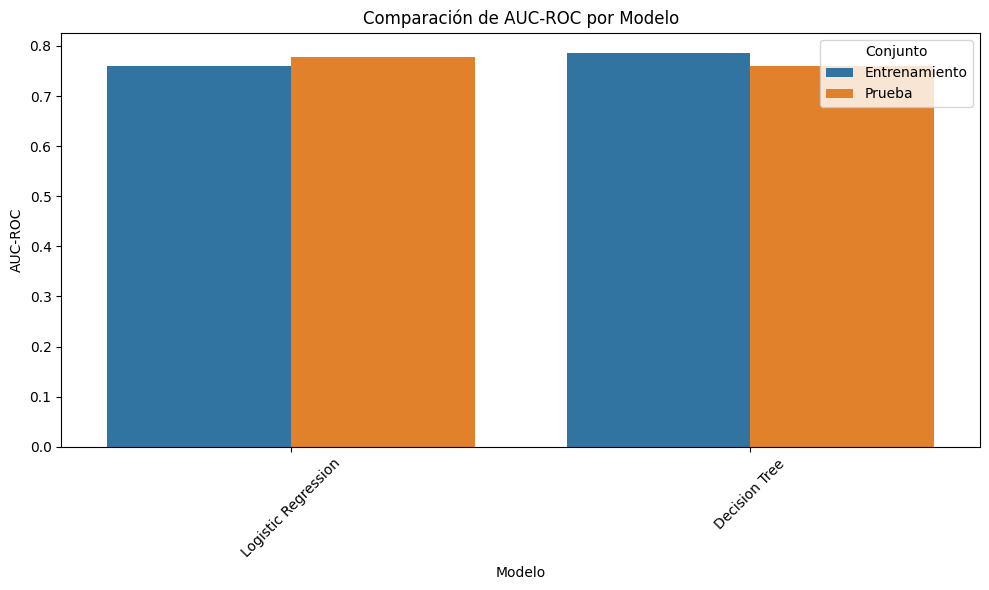

In [38]:
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Mode Classifier': mode_model  # Asumiendo que esta función ha sido ajustada para manejar predict_mode_proba
}

# Comparar rendimiento en entrenamiento y prueba
compare_performance(models, X_train, y_train, X_test, y_test)


#### Preguntas

+ Con que funcion de perdida estamos entrenando los modelos?

### Class Scores

No importa que las funciones de `sklearn` se llamen `predict_proba`, estas siguien prediciendo `class_scores`. Este nombre ha dado lugar a muchas confusiones, pero es importante siempre tenerlo en mente. 

El metodo de moda de `scipy` no tiene `predit_proba` asiq ue hay que crearlo. Siempre asigna probabilidad 1 a la clase mas comun, y cero a la otra.

In [ ]:
def predict_mode_proba(X, most_common_class):
    # Todos los scores serán 1 para la clase más común y 0 para la otra
    if most_common_class == 0:
        return np.zeros((len(X), 2))
    else:
        return np.ones((len(X), 2))


In [45]:
from sklearn.calibration import calibration_curve

def compare_class_scores_and_calibration(models, X_test, y_test):
    # Configurar el tamaño del gráfico
    plt.figure(figsize=(10, 14))
    
    # Parte 1: Comparación de Class Scores
    plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            scores = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 1
            sns.kdeplot(scores, label=name, fill=True, alpha=0.5)
        else:
            # Manejar modelos sin predict_proba
            print(f"{name} no soporta predict_proba, omitiendo...")

    plt.title('Comparación de Class Scores de Modelos')
    plt.xlabel('Class Score')
    plt.ylabel('Densidad')
    plt.legend()

    # Parte 2: Gráficos de Calibración
    plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            prob_true, prob_pred = calibration_curve(y_test, model.predict_proba(X_test)[:, 1], n_bins=20, strategy='uniform')
            plt.plot(prob_pred, prob_true, marker='o', label=name, linestyle='-', linewidth=2)
        else:
            # Manejar modelos sin predict_proba
            continue
    
    # Dibujar línea de calibración perfecta
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Calibración perfecta', linewidth=2)
    
    plt.title('Curva de Calibración de Modelos')
    plt.xlabel('Probabilidad Predicha')
    plt.ylabel('Frecuencia de Clase Positiva')
    plt.legend()
    plt.tight_layout()
    plt.show()


Mode Classifier no soporta predict_proba, omitiendo...


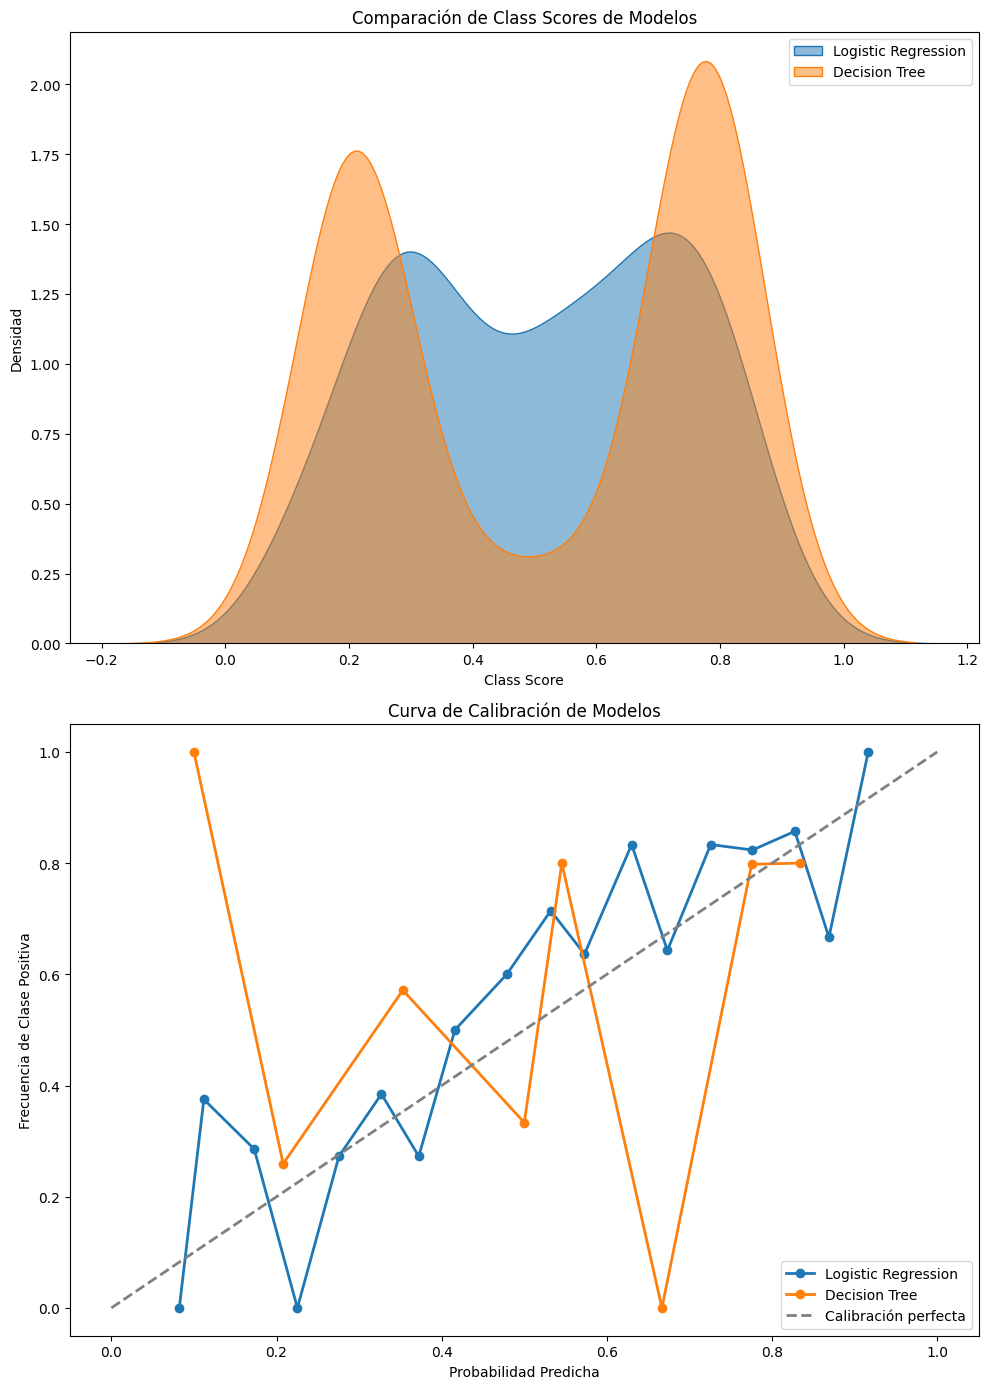

In [46]:
# Definir modelos en un diccionario para facilitar el acceso
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Mode Classifier': mode_model  # Asumiendo que esta función ha sido ajustada para manejar predict_mode_proba
}

# Comparar "class scores" y "calibracion"
compare_class_scores_and_calibration(models, X_test, y_test)



## Significado de la Curva de Calibración

La curva de calibración es una herramienta visual utilizada en problemas de clasificación para evaluar qué tan bien las probabilidades predichas por un modelo se alinean con las frecuencias reales de la clase positiva. Esta curva muestra la relación entre:

- **Eje X (Probabilidad Predicha):** Las probabilidades predichas por el modelo de que una observación pertenezca a la clase positiva, organizadas en intervalos o "bins".
- **Eje Y (Frecuencia de Clase Positiva):** La proporción real de observaciones que son positivas para cada intervalo de probabilidad predicha.

### Línea de 45 Grados: Calibración Perfecta

La línea diagonal de 45 grados en el gráfico de calibración representa la **calibración perfecta**. Esto significa que para cualquier probabilidad predicha por el modelo, la proporción real de observaciones positivas en los datos es exactamente igual a esa probabilidad. Por ejemplo, si un modelo predice un 70% de probabilidad para un grupo de observaciones, esperamos que exactamente el 70% de esas observaciones sean positivas si el modelo está perfectamente calibrado.

Una curva que sigue de cerca esta línea diagonal indica que las probabilidades predichas son muy precisas en comparación con las probabilidades reales observadas, marcando un buen nivel de calibración del modelo. Por el contrario, una curva que se desvía de esta línea sugiere que las probabilidades predichas no reflejan con precisión las probabilidades reales, lo que puede llevar a decisiones basadas en información errónea.

### Creación de la Curva de Calibración

Para crear la curva de calibración, se sigue este proceso:

1. **División de Probabilidades Predichas en Intervalos:** Se agrupan las probabilidades predichas en un número determinado de intervalos o "bins" (por ejemplo, 0-10%, 11-20%, ... , 91-100%).

2. **Cálculo de la Proporción Real de Observaciones Positivas:** Para cada intervalo, se calcula la proporción real de observaciones que son efectivamente positivas.

3. **Representación Gráfica de los Resultados:** Se grafican estos puntos, donde el eje x representa el centro de cada intervalo de probabilidad predicha, y el eje y muestra la proporción real de observaciones positivas para ese intervalo.

4. **Comparación con la Línea de Referencia:** Se traza una línea de 45 grados en el gráfico como referencia de una calibración perfecta, permitiendo una comparación visual directa.

La curva de calibración ofrece una evaluación crucial de la confiabilidad de las probabilidades predichas por un modelo de clasificación, siendo especialmente importante en contextos donde las decisiones se basan en estas probabilidades estimadas.
